In [ ]:
# display information about available GPU devices
!nvidia-smi

Thu Feb  1 22:18:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0              26W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Mounted at /content/drive
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19171 sha256=d92dfd484f84c5461cef276a73b062e1ad490f0058b2ee1546a95a8393f9ce10
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built nvidia-ml-py3
Clothes: 1880
E-Waste: 1590
Glass: 1746
Metal: 1878
Plastic: 1968
Trash: 1800
Paper: 1824
Cardboard: 2296

Total number of train images: 14982


<ipython-input-1-a5b7026bd355>:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


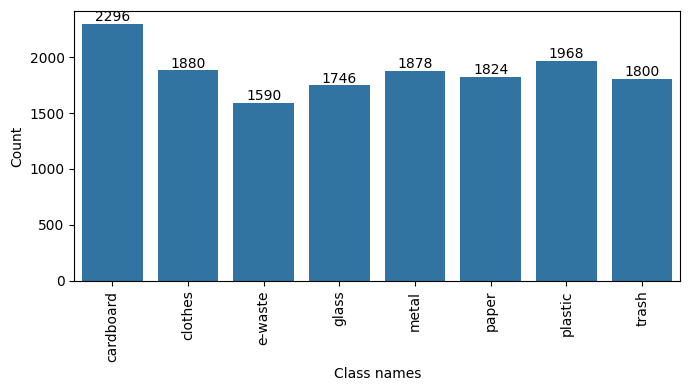

In [ ]:
# Mount data from drive
from google.colab import drive
drive.mount("/content/drive")



!pip install split-folders

!pip install --upgrade nvidia-ml-py3

import tensorflow as tf
import os
import shutil
import splitfolders
from pathlib import Path
import imghdr
import numpy as np

import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
# ##Data Preprcessing##


# a fixed SEED value ensures that we get exactly the same split of data next time.
SEED = 42



#Setting paths to training and test data
train_path = '/content/drive/MyDrive/optuna/workfile/working/data/train'
val_path = '/content/drive/MyDrive/optuna/workfile/working/data/val'
test_path = '/content/drive/MyDrive/optuna/workfile/working/data/test'


#distribution of data between classes
total = 0
for category in os.listdir(train_path):
    count= 0
    for image in os.listdir(train_path + "/" + category):
        count += 1
        total +=1
    print(str(category).title() + ": " + str(count))
print(f"\nTotal number of train images: {total}")

# class names
class_names = sorted(os.listdir(train_path))
class_names

class_dis = [len(os.listdir(train_path + f"/{name}")) for name in class_names]
class_dis


DF = pd.DataFrame(columns=['Class names','Count'])
DF['Class names']=class_names
DF['Count']=class_dis
plt.figure(figsize=(7,4))
ax=sns.barplot(x='Class names', y='Count', data=DF)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

Found 14527 files belonging to 8 classes.
Found 1821 files belonging to 8 classes.
Found 1818 files belonging to 8 classes.
82420632/82420632 [==============================] - 3s 0us/step
Epoch 1/20
454/454 [==============================] - ETA: 0s - loss: 0.3918 - accuracy: 0.8708

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


454/454 [==============================] - 1141s 2s/step - loss: 0.3918 - accuracy: 0.8708 - val_loss: 0.2317 - val_accuracy: 0.9257 - lr: 5.4618e-04
Epoch 2/20
454/454 [==============================] - 277s 607ms/step - loss: 0.2176 - accuracy: 0.9253 - val_loss: 0.1882 - val_accuracy: 0.9395 - lr: 5.4618e-04
Epoch 3/20
454/454 [==============================] - 247s 544ms/step - loss: 0.1780 - accuracy: 0.9389 - val_loss: 0.1692 - val_accuracy: 0.9483 - lr: 5.4618e-04
Epoch 4/20
454/454 [==============================] - 197s 432ms/step - loss: 0.1471 - accuracy: 0.9486 - val_loss: 0.1583 - val_accuracy: 0.9483 - lr: 5.4618e-04
Epoch 5/20
454/454 [==============================] - 184s 403ms/step - loss: 0.1330 - accuracy: 0.9545 - val_loss: 0.1437 - val_accuracy: 0.9560 - lr: 5.4618e-04
Epoch 6/20
454/454 [==============================] - 173s 380ms/step - loss: 0.1122 - accuracy: 0.9623 - val_loss: 0.1432 - val_accuracy: 0.9527 - lr: 5.4618e-04
Epoch 7/20
454/454 [===============

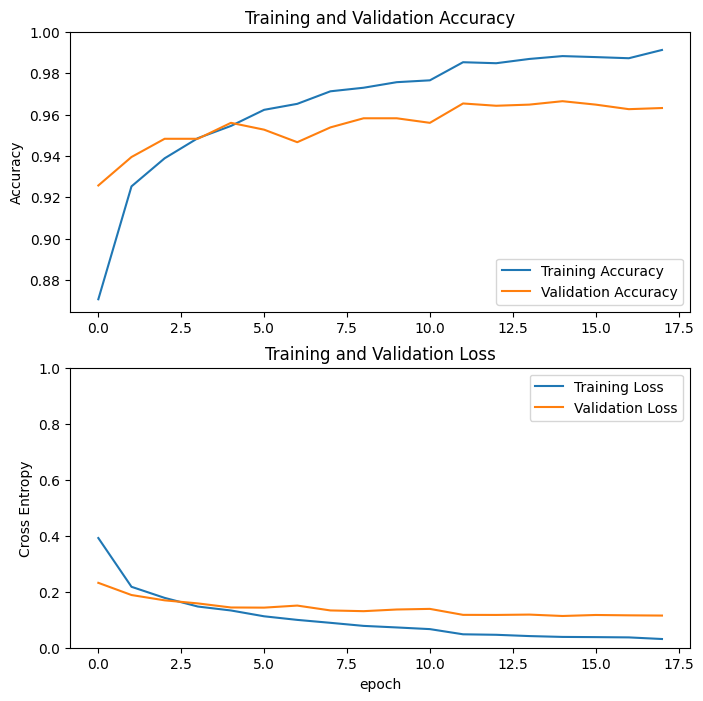

Test Loss: 0.13077
Test Accuracy: 96.21%
57/57 [==============================] - 9s 112ms/step
Classification Report 

              precision    recall  f1-score   support

   cardboard       0.96      0.95      0.96       283
     clothes       1.00      0.99      0.99       236
     e-waste       0.98      0.98      0.98       155
       glass       0.99      0.98      0.98       214
       metal       0.94      0.99      0.96       234
       paper       0.96      0.94      0.95       228
     plastic       0.95      0.94      0.95       247
       trash       0.93      0.94      0.93       224

    accuracy                           0.96      1821
   macro avg       0.96      0.96      0.96      1821
weighted avg       0.96      0.96      0.96      1821



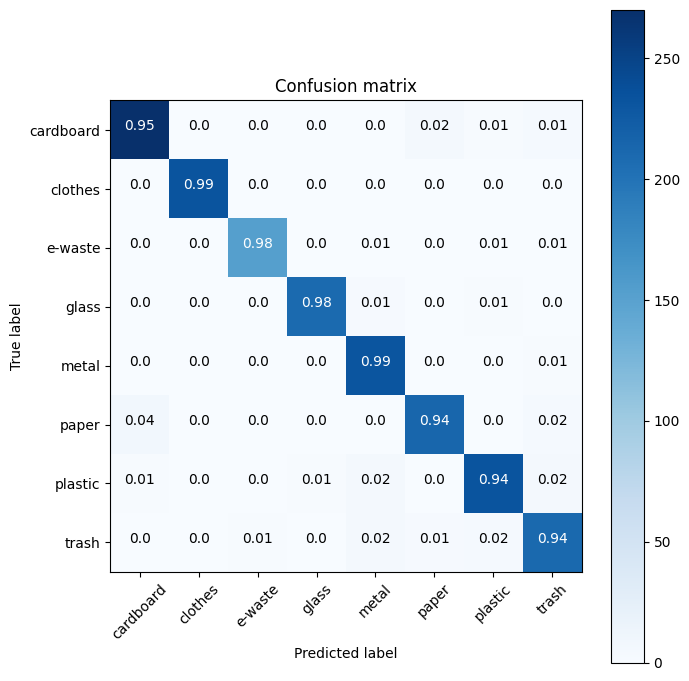

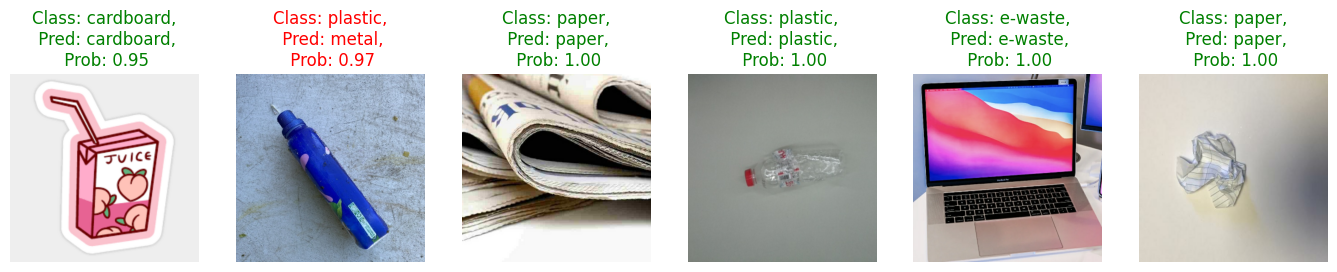

In [ ]:
IMG_SIZE = (384, 384)

#The number of images in each batch during training or evaluation.
BATCH_SIZE = 32


train_data = tf.keras.utils.image_dataset_from_directory(train_path,
                                                         image_size=IMG_SIZE,
                                                         label_mode='categorical',
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         seed=SEED)

test_data = tf.keras.utils.image_dataset_from_directory(test_path,
                                                        image_size=IMG_SIZE,
                                                        label_mode='categorical',
                                                        batch_size=BATCH_SIZE,
                                                        shuffle=False)

validation_data = tf.keras.utils.image_dataset_from_directory(val_path,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE,
                                                              shuffle=True,
                                                              seed=SEED)





#  ##Building the model##

#instantiate a base model with pre-trained weights.
base_model = tf.keras.applications.EfficientNetV2S(include_top=False,
                                                   weights='imagenet', # Load weights pre-trained on ImageNet.
                                                   input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

#Freeze all layers in the base model so that its parameters do not change during training.
base_model.trainable = False


#This layer is active only during model training.

#create a data augmentation layer to improve classification accuracy.
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal"),
                                         tf.keras.layers.RandomRotation(0.2),
                                         tf.keras.layers.RandomZoom(0.2),
                                         tf.keras.layers.RandomHeight(0.2),
                                         tf.keras.layers.RandomWidth(0.2),],
                                         name ="data_augmentation")


name="EfficientNetV2S"

# Define input layer
inputs = tf.keras.Input(shape=(384, 384, 3), name="input_layer")

# Apply data augmentation
x = data_augmentation(inputs)

# Apply base model
x = base_model(x, training=False)

# Add global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add dense layer with 512 units and relu activation
x = tf.keras.layers.Dense(512, activation='relu')(x)

# Add dropout layer with rate 0.2
x = tf.keras.layers.Dropout(0.2)(x) # Regularize with dropout

# Add output layer with softmax activation
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

# Create model
EfficientNetV2S_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="EfficientNetV2S")

# configures the model for training
#For training, we will define a loss function, an optimizer, and a tracked accuracy metric
EfficientNetV2S_model.compile(loss='categorical_crossentropy', #It computes the crossentropy loss between the true labels and the predicted labels.
                              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005461836650512608), #updating the model's weights during training based on the computed gradients.
                              metrics=['accuracy'])

#  callback function to stop training when the metrics being tracked stop improving.
# Creating a Callback Function
def create_callback(model_name):

    # termination of training when accuracy does not improve within 3 epochs
    early_stop = tf.keras.callbacks.EarlyStopping(patience=3,
                                                monitor="val_loss",
                                                mode="min", # stop when the quantity monitored has stopped decreasing.
                                                verbose=1)

    # decrease in learning rate when the error rate(val_loss) does not decrease over 2 epochs
    reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                              factor=0.2,
                                                              patience=2,
                                                              verbose=1,
                                                              min_lr=0.00001)


    # saving model with the best validation accuracy
    check_model = tf.keras.callbacks.ModelCheckpoint(model_name + ".h5",
                                                   monitor="val_accuracy",
                                                   mode="max",
                                                   save_best_only=True)
    callback = [early_stop, reduce_learning_rate, check_model]
    return callback


EfficientNetV2S_callback = create_callback(name)

# number of training epochs
EPOCH=20

import time
start_time = time.time()



#  train the model
EfficientNetV2S_history = EfficientNetV2S_model.fit(train_data,
                                                    epochs=EPOCH,
                                                    steps_per_epoch=len(train_data),
                                                    validation_data=validation_data,
                                                    validation_steps=len(validation_data),
                                                    callbacks=EfficientNetV2S_callback)




#  model training schedules
end_time = time.time()
training_time = end_time - start_time
print("Total training time: {:.2f} seconds".format(training_time))

#saving the model
EfficientNetV2S_model.save("/content/drive/MyDrive/optuna/workfile/workingOriginal2Copy/garbage_classification.h5")


EfficientNetV2S_history.history.keys()

acc = EfficientNetV2S_history.history['accuracy']
val_acc = EfficientNetV2S_history.history['val_accuracy']

loss = EfficientNetV2S_history.history['loss']
val_loss = EfficientNetV2S_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Model Evaluation ##TESTING##


# evaluate the accuracy of the model on new data
test_loss, test_accuracy = EfficientNetV2S_model.evaluate(test_data, verbose=0)

print("Test Loss: {:.5f}".format(test_loss))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


# Prediction Metrics and Classification Report
pred_probs = EfficientNetV2S_model.predict(test_data, verbose=1) #predicts class probabilities for the test dataset.
pred_classes = pred_probs.argmax(axis=1) #The predicted classes are extracted by finding the index of the maximum probability.
pred_classes[:10]
y_labels = []
for images, labels in test_data.unbatch():
    y_labels.append(labels.numpy().argmax())
y_labels[:10]
# precision, recall, F1-score, and support
print('Classification Report \n')
target_names = class_names
print(classification_report(y_labels, pred_classes, target_names=target_names))

# The “Precision” column shows the percentage of correct predictions among all predictions for a particular class.
# The "Recall" column shows the percentage of images of a particular class that were predicted by the model to belong to that class.
# Column “F1” shows what percentage of model predictions were correct.
# The "Support" column shows how many images of each class were in the test dataset.



# Confusion Matrix
import itertools

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=2)
    cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_labels, pred_classes)
plot_confusion_matrix(cm, class_names)




# Visualizing several model predictions
def pred_random_images(model_name, folder_path, class_names):
    plt.figure(figsize=(17, 10))
    for i in range(6):
        class_name = random.choice(class_names)
        filename = random.choice(os.listdir(folder_path + "/" + class_name))
        filepath = folder_path + "/" + class_name + "/" + filename

        img = tf.io.read_file(filepath)
        img = tf.image.decode_jpeg(img)
        img = tf.image.resize(img, [IMG_SIZE[0], IMG_SIZE[1]])
        pred_prob = model_name.predict(tf.expand_dims(img, axis=0), verbose=0)
        pred_class = class_names[pred_prob.argmax()]


# Plot the image(s)
        plt.subplot(1, 6, i+1)
        plt.imshow(img/255.)
        if class_name == pred_class:
            title_color = "g"
        else:
            title_color = "r"
        plt.title(f"Class: {class_name},\n Pred: {pred_class},\n Prob: {pred_prob.max():.2f}", c=title_color)
        plt.axis(False);


pred_random_images(EfficientNetV2S_model, test_path, class_names)

Number of layers in the base model:  513
Model: "EfficientNetV2S"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 384, 384, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-s (Function  (None, 12, 12, 1280)      20331360  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
          

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


454/454 [==============================] - 98s 215ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.1202 - val_accuracy: 0.9670 - lr: 5.4618e-05
Epoch 21/40
454/454 [==============================] - 98s 214ms/step - loss: 0.0256 - accuracy: 0.9925 - val_loss: 0.1144 - val_accuracy: 0.9686 - lr: 1.0924e-05
Epoch 22/40
454/454 [==============================] - 97s 211ms/step - loss: 0.0251 - accuracy: 0.9926 - val_loss: 0.1162 - val_accuracy: 0.9670 - lr: 1.0924e-05
Epoch 23/40
454/454 [==============================] - 92s 200ms/step - loss: 0.0241 - accuracy: 0.9929 - val_loss: 0.1141 - val_accuracy: 0.9686 - lr: 1.0924e-05
Epoch 24/40
454/454 [==============================] - 94s 205ms/step - loss: 0.0203 - accuracy: 0.9945 - val_loss: 0.1160 - val_accuracy: 0.9692 - lr: 1.0924e-05
Epoch 25/40
454/454 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9936
Epoch 25: ReduceLROnPlateau reducing learning rate to 1e-05.
454/454 [==============================

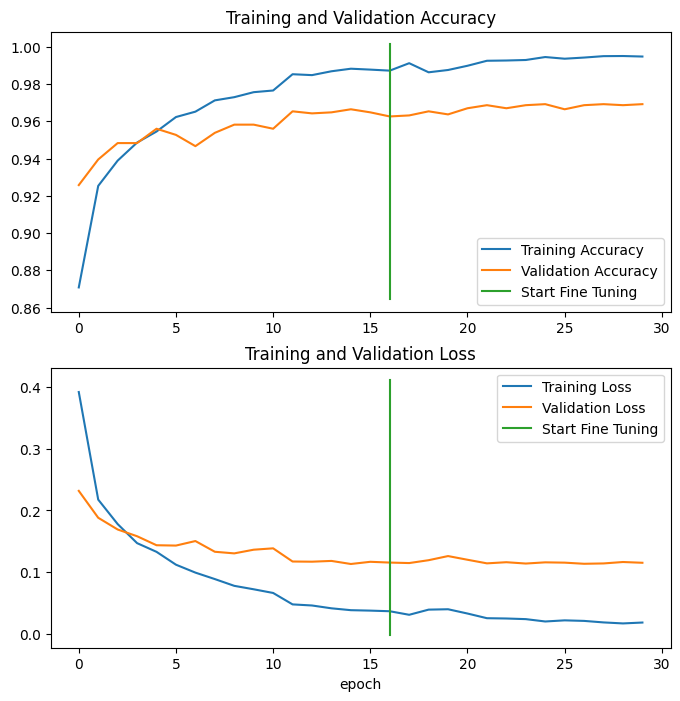

Test Loss: 0.13116
Test Accuracy: 96.54%
0.9654036164283752
57/57 [==============================] - 9s 113ms/step
Classification Report 

              precision    recall  f1-score   support

   cardboard       0.96      0.96      0.96       283
     clothes       1.00      0.99      1.00       236
     e-waste       0.98      0.98      0.98       155
       glass       1.00      0.99      0.99       214
       metal       0.94      0.99      0.96       234
       paper       0.96      0.95      0.95       228
     plastic       0.97      0.94      0.95       247
       trash       0.93      0.93      0.93       224

    accuracy                           0.97      1821
   macro avg       0.97      0.97      0.97      1821
weighted avg       0.97      0.97      0.97      1821



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


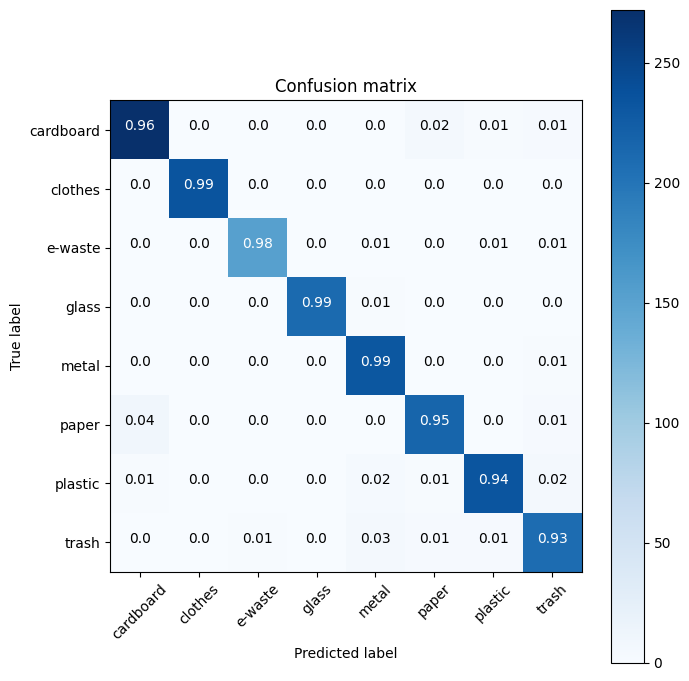

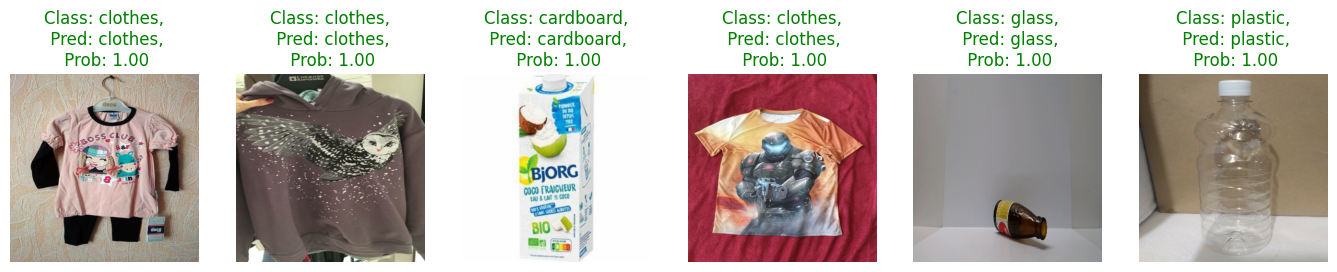

In [ ]:
##fine-tuning##
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# make all layers in the base model trainable
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 20

# Freeze all layers except for the last 20
for layer in base_model.layers[:-fine_tune_at]:
  layer.trainable = False

# Compile the model
EfficientNetV2S_model.compile(loss='categorical_crossentropy',
                              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005461836650512608/10),
                              metrics=['accuracy'])



# out of more than 20 million parameters, only 165 thousand are trainable, which will significantly reduce training time.
EfficientNetV2S_model.summary()

len(EfficientNetV2S_model.trainable_variables)

history_fine=EfficientNetV2S_model.fit(train_data,
                                       epochs=40,
                                       initial_epoch=EfficientNetV2S_history.epoch[-1],
                                       steps_per_epoch=len(train_data),
                                       validation_data=validation_data,
                                       validation_steps=len(validation_data),
                                       callbacks=EfficientNetV2S_callback)

def compare_historys(original_history, new_history, initial_epochs=20):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()


compare_historys(original_history=EfficientNetV2S_history,
                 new_history=history_fine,
                 initial_epochs=EfficientNetV2S_history.epoch[-1])

test_loss, test_accuracy = EfficientNetV2S_model.evaluate(test_data, verbose=0)

print("Test Loss: {:.5f}".format(test_loss))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print(test_accuracy)



# Prediction Metrics and Classification Report
pred_probs = EfficientNetV2S_model.predict(test_data, verbose=1) #predicts class probabilities for the test dataset.
pred_classes = pred_probs.argmax(axis=1) #The predicted classes are extracted by finding the index of the maximum probability.
pred_classes[:10]
y_labels = []
for images, labels in test_data.unbatch():
    y_labels.append(labels.numpy().argmax())
y_labels[:10]
# precision, recall, F1-score, and support
print('Classification Report \n')
target_names = class_names
print(classification_report(y_labels, pred_classes, target_names=target_names))




# Confusion Matrix
import itertools

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=2)
    cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_labels, pred_classes)
plot_confusion_matrix(cm, class_names)



# Visualizing several model predictions
def pred_random_images(model_name, folder_path, class_names):
    plt.figure(figsize=(17, 10))
    for i in range(6):
        class_name = random.choice(class_names)
        filename = random.choice(os.listdir(folder_path + "/" + class_name))
        filepath = folder_path + "/" + class_name + "/" + filename

        img = tf.io.read_file(filepath)
        img = tf.image.decode_jpeg(img)
        img = tf.image.resize(img, [IMG_SIZE[0], IMG_SIZE[1]])
     #  img = img/255.
        pred_prob = model_name.predict(tf.expand_dims(img, axis=0), verbose=0)
        pred_class = class_names[pred_prob.argmax()]


# Plot the image(s)
        plt.subplot(1, 6, i+1)
        plt.imshow(img/255.)
        if class_name == pred_class:
            title_color = "g"
        else:
            title_color = "r"
        plt.title(f"Class: {class_name},\n Pred: {pred_class},\n Prob: {pred_prob.max():.2f}", c=title_color)
        plt.axis(False);


pred_random_images(EfficientNetV2S_model, test_path, class_names)


#saving the model
EfficientNetV2S_model.save("/content/drive/MyDrive/optuna/workfile/workingOriginal2Copy/garbage-classification_finetune.h5")